In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [3]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
nomes = {
    'unfinished':'nao_finalizado',
    'expected_hours':'horas_esperadas',
    'price':'preco'
}

In [5]:
# Renomeando as colunas
dados = dados.rename(columns=nomes)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [6]:
# Alterando a lógico do finalizado
trocar = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados['nao_finalizado'].map(trocar)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


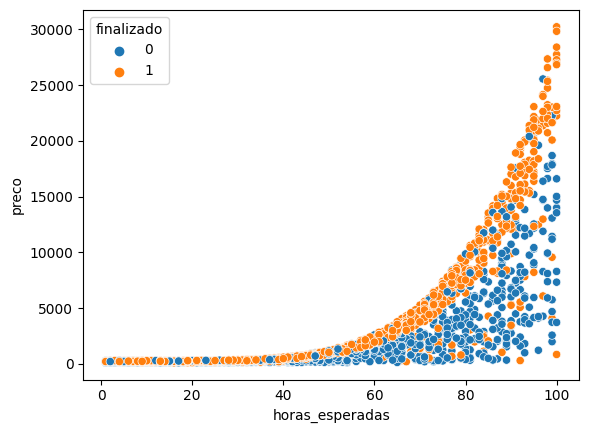

In [7]:
# Com o gráfico conseguimos ver que os projetos que forma concluidos tem preço maior

sns.scatterplot(x = 'horas_esperadas', y = 'preco', data = dados, hue = 'finalizado');

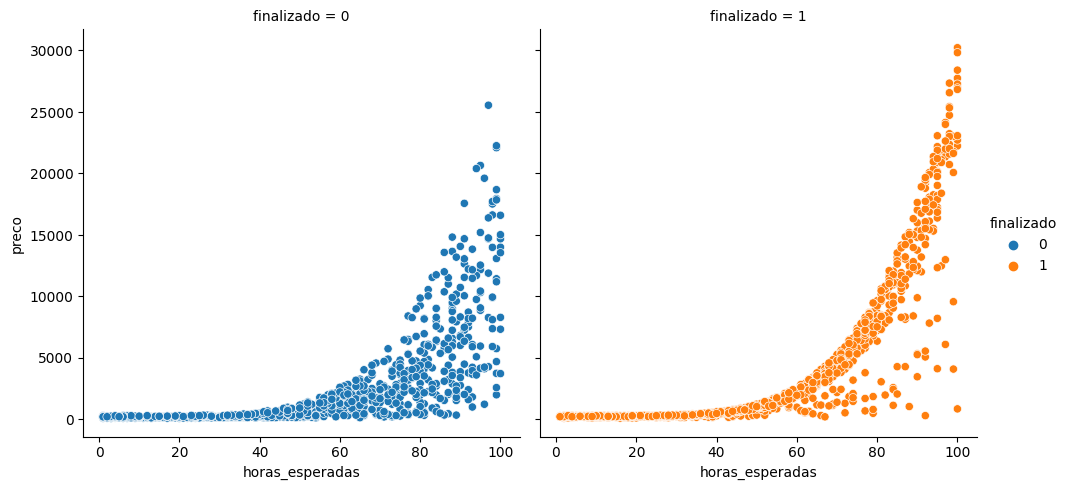

In [8]:
sns.relplot(x = 'horas_esperadas', y = 'preco', hue= 'finalizado', col = 'finalizado', data= dados);

In [9]:
dados.head(1)

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0


In [10]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado'] 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .25, random_state= 20, stratify= y)

In [12]:
modelo = LinearSVC()

modelo.fit(x_train, y_train)


/home/evaldoj/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [13]:
previsoes = modelo.predict(x_test)

In [14]:
accuracy_score(y_test, previsoes)

0.5425925925925926

In [15]:
# Como a performance do algoritmo foi muito ruim, resolvi dar um chute seco, colocando todos os resultados em 1
# Com isso, vejo que meu algoritmo realmente foi muito mal na performance
# Agora é ver o que pode ser melhorado para ter uma acurácia decente
baseline = np.ones(540)
accuracy_score(y_test, baseline) * 100

52.59259259259259

In [21]:
y_test

499     0
1149    1
870     1
1617    0
1896    1
       ..
151     1
1357    1
295     0
1239    1
626     1
Name: finalizado, Length: 540, dtype: int64

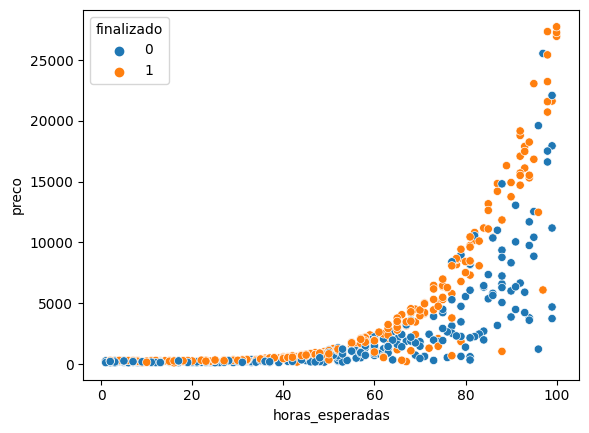

In [18]:
sns.scatterplot(x = 'horas_esperadas', y = 'preco', data = x_test, hue = y_test);

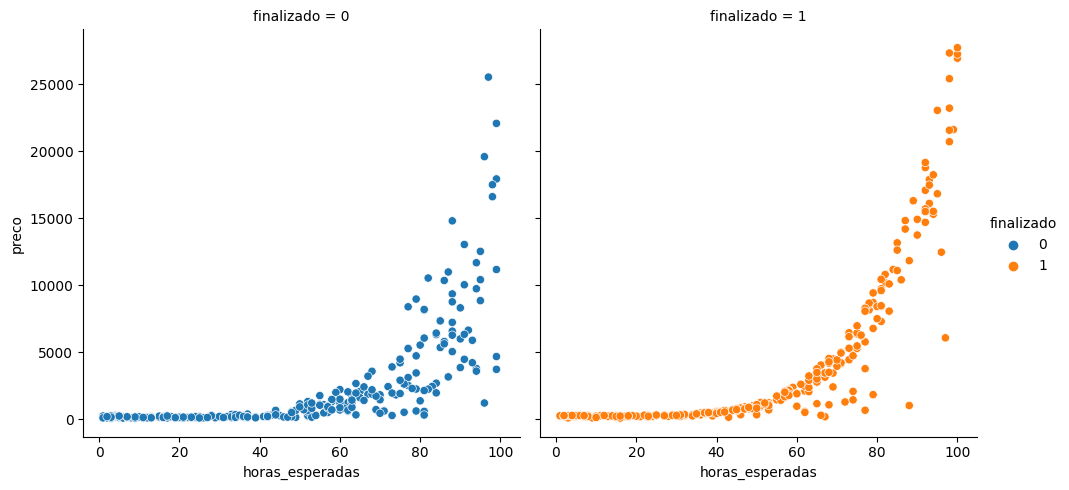

In [22]:
sns.relplot(x = 'horas_esperadas', y = 'preco', hue= y_test, col = y_test, data= x_test);

### Verificando a Curva de Aprendizagem do Modelo

In [23]:
x_min = x_test['horas_esperadas'].min()
x_max = x_test['horas_esperadas'].max()
y_min = x_test['preco'].min()
y_max = x_test['preco'].max()

In [25]:
pixels = 100 # Dinfindo a quantidade de Pixels que quero na imagem

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [26]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [28]:
z= modelo.predict(pontos)
z= z.reshape(xx.shape)
z

/home/evaldoj/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

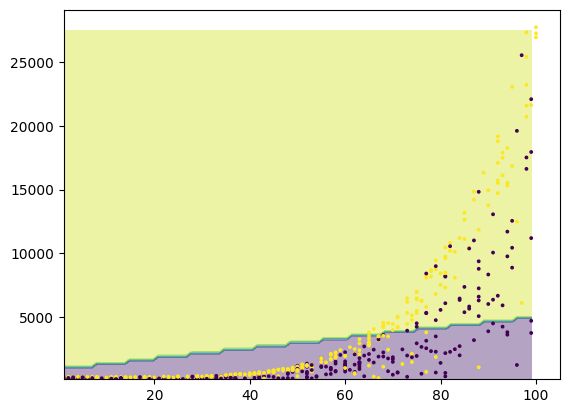

In [38]:
plt.contourf(xx, yy, z, alpha = 0.4)
plt.scatter(x_test['horas_esperadas'], x_test['preco'], c= y_test, s= 3);


Conforme vemos, a curva de decisão do modelo não é a mais adequada para o tipo de problema que venho tentanto resolver.

O mais adequada é tentar utilizar outro tipo de algoritmo

### **Testando outro Modelo**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


# Quando utilizo este Seed o SKlearning assume este valor como seed para todos os métodos
SEED = 5
np.random.seed(SEED)

x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .25, random_state= 20, stratify= y)

modelo = SVC(gamma= 'auto')

modelo.fit(x_train, y_train)

previsoes = modelo.predict(x_test)

accuracy_score(y_test, previsoes) *100

58.88888888888889

/home/evaldoj/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


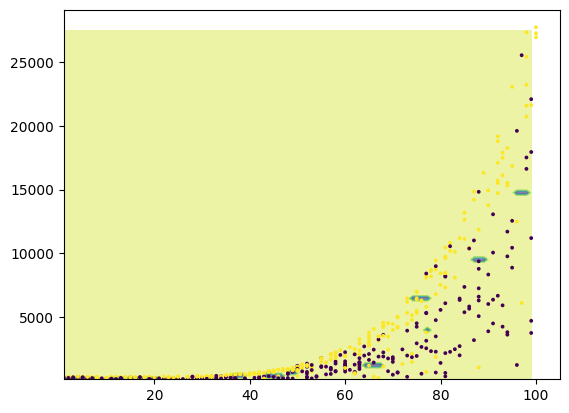

In [42]:
x_min = x_test['horas_esperadas'].min()
x_max = x_test['horas_esperadas'].max()
y_min = x_test['preco'].min()
y_max = x_test['preco'].max()

pixels = 100 # Dinfindo a quantidade de Pixels que quero na imagem

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]


z= modelo.predict(pontos)
z= z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha = 0.4)
plt.scatter(x_test['horas_esperadas'], x_test['preco'], c= y_test, s= 3);

In [44]:
from sklearn.preprocessing import StandardScaler

In [49]:
# Quando utilizo este Seed o SKlearning assume este valor como seed para todos os métodos
SEED = 5
np.random.seed(SEED)

x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado'] 

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size= .25, stratify= y)

# 
scaler = StandardScaler()
x_train = scaler.fit_transform(raw_x_train)
x_test = scaler.fit_transform(raw_x_test)


modelo = SVC(gamma= 'auto')

modelo.fit(x_train, y_train)

previsoes = modelo.predict(x_test)

accuracy_score(y_test, previsoes) *100

67.4074074074074

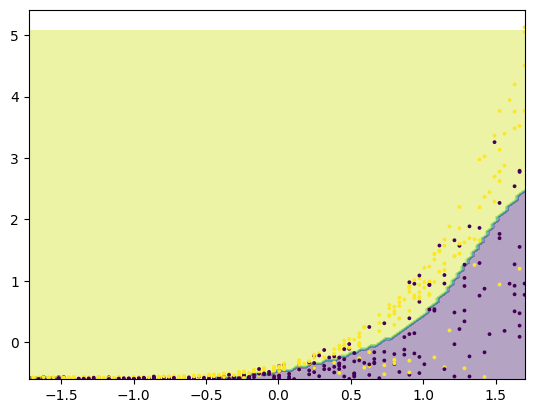

In [51]:
data_x = x_test[:,0]
data_y = x_test[:,1]


x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100 # Dinfindo a quantidade de Pixels que quero na imagem

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]


z= modelo.predict(pontos)
z= z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha = 0.4)
plt.scatter(data_x, data_y, c= y_test, s= 3);